In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("Fbdata.csv")
df

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.000000,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.000000,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.000000,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.000000,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.000000,1,1.29,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,19/08/2017,19/08/2017,45-49,F,109,111,114,1129773,252,358.189997,13,2.00,NaN,NaN
1139,1314411,19/08/2017,19/08/2017,45-49,F,110,111,116,637549,120,173.880003,3,0.00,NaN,NaN
1140,1314412,19/08/2017,19/08/2017,45-49,F,111,113,117,151531,28,40.289999,2,0.00,NaN,NaN
1141,1314414,17/08/2017,17/08/2017,45-49,F,113,114,117,790253,135,198.710001,8,2.00,NaN,NaN


In [2]:
df.dtypes

ad_id                    int64
reporting_start         object
reporting_end           object
campaign_id             object
fb_campaign_id          object
age                     object
gender                  object
interest1                int64
interest2                int64
interest3                int64
impressions            float64
clicks                   int64
spent                  float64
total_conversion       float64
approved_conversion    float64
dtype: object

In [3]:
missing_values = df.isnull().sum()
missing_values

ad_id                    0
reporting_start          0
reporting_end            0
campaign_id              0
fb_campaign_id           0
age                      0
gender                   0
interest1                0
interest2                0
interest3                0
impressions              0
clicks                   0
spent                    0
total_conversion       382
approved_conversion    382
dtype: int64

In [4]:
df['total_conversion'] = df['total_conversion'].fillna(df['total_conversion'].mean())
df['approved_conversion'] = df['approved_conversion'].fillna(df['approved_conversion'].mean())

In [5]:
# Convert date columns to datetime 
df['reporting_start'] = pd.to_datetime(df['reporting_start'], format='%d/%m/%Y')
df['reporting_end'] = pd.to_datetime(df['reporting_end'], format='%d/%m/%Y')

In [6]:
# Calculate Campaign Duration
df['campaign_duration'] = (df['reporting_end'] - df['reporting_start']).dt.days
df['campaign_duration'].head()


0    0
1    0
2    0
3    0
4    0
Name: campaign_duration, dtype: int64

In [7]:
all_zero = (df['campaign_duration'] == 0).all()
print(all_zero) # IF true --> all durations of the campaign (reporting_start - reporting_end) are 0. 
                #This means that each reporting is only for the current day

True


In [8]:
# Calculate Engagement Rate, avoiding division by zero
df['engagement_rate'] = df['clicks'] / df['impressions'].replace(0, 1e-10)
df['engagement_rate'].head()

0    0.000136
1    0.000112
2    0.000000
3    0.000235
4    0.000242
Name: engagement_rate, dtype: float64

In [9]:
duplicates = df.duplicated().sum()
duplicates

0

In [10]:
# Check for NaN or infinite values
print("Checking for NaN values:")
print(df.isna().sum())

print("Checking for infinite values:")
print((df == float('inf')).sum())

Checking for NaN values:
ad_id                  0
reporting_start        0
reporting_end          0
campaign_id            0
fb_campaign_id         0
age                    0
gender                 0
interest1              0
interest2              0
interest3              0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
campaign_duration      0
engagement_rate        0
dtype: int64
Checking for infinite values:
ad_id                  0
reporting_start        0
reporting_end          0
campaign_id            0
fb_campaign_id         0
age                    0
gender                 0
interest1              0
interest2              0
interest3              0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
campaign_duration      0
engagement_rate        0
dtype: int64


In [11]:
df.drop(columns=['fb_campaign_id',], inplace=True)

In [12]:
df.dtypes

ad_id                           int64
reporting_start        datetime64[ns]
reporting_end          datetime64[ns]
campaign_id                    object
age                            object
gender                         object
interest1                       int64
interest2                       int64
interest3                       int64
impressions                   float64
clicks                          int64
spent                         float64
total_conversion              float64
approved_conversion           float64
campaign_duration               int64
engagement_rate               float64
dtype: object

In [13]:
print("Grab the first dataset for analysis:")
df_slice = df[:761].copy()

Grab the first dataset for analysis:


In [14]:
print("Start analysis of the following data:")
df_slice

Start analysis of the following data:


,ad_id,reporting_start,reporting_end,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,campaign_duration,engagement_rate
0,708746,2017-08-17,2017-08-17,916,30-34,M,15,17,17,7350.0,1,1.430000,2.0,1.0,0,0.000136
1,708749,2017-08-17,2017-08-17,916,30-34,M,16,19,21,17861.0,2,1.820000,2.0,0.0,0,0.000112
2,708771,2017-08-17,2017-08-17,916,30-34,M,20,25,22,693.0,0,0.000000,1.0,0.0,0,0.000000
3,708815,2017-08-30,2017-08-30,916,30-34,M,28,32,32,4259.0,1,1.250000,1.0,0.0,0,0.000235
4,708818,2017-08-17,2017-08-17,916,30-34,M,28,33,32,4133.0,1,1.290000,1.0,1.0,0,0.000242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1121585,2017-08-20,2017-08-20,1178,40-44,M,66,72,68,9773.0,1,1.460000,1.0,0.0,0,0.000102
757,1121589,2017-08-20,2017-08-20,1178,45-49,M,10,16,11,464036.0,77,123.550000,3.0,1.0,0,0.000166
758,1121590,2017-08-20,2017-08-20,1178,45-49,M,10,16,15,478480.0,75,135.750001,3.0,1.0,0,0.000157
759,1121592,2017-08-20,2017-08-20,1178,45-49,M,10,14,11,428812.0,66,116.880000,4.0,2.0,0,0.000154


In [15]:
print("Analysis of users interactions:\n")

print("Gender ratio:")

# Count the gender instances
df_slice.gender.value_counts()

Analysis of users interactions:

Gender ratio:


gender
M    486
F    275
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='Count'>

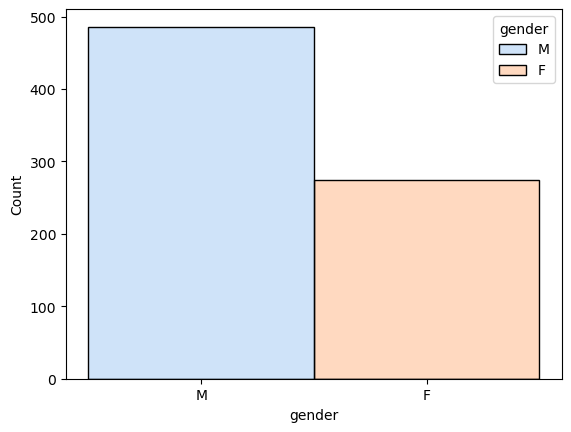

In [16]:
# Plot the gender distribution
sns.histplot(data=df_slice, x='gender', hue='gender', palette='pastel')

In [17]:
print("Age groups:")

# Count the different groups
df_slice.age.value_counts()

Age groups:


age
30-34    327
35-39    180
40-44    139
45-49    115
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

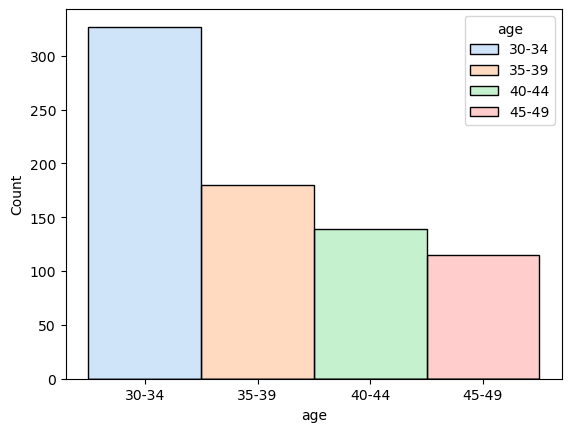

In [18]:
# Plot the age groups
sns.histplot(data=df_slice, x='age', hue='age', palette='pastel')

In [19]:
print('Gender distribution per campaign:')

print(df_slice.groupby(['campaign_id', 'gender']).size())


Gender distribution per campaign:
campaign_id  gender
1178         M         243
916          F          19
             M          35
936          F         256
             M         208
dtype: int64


<Axes: xlabel='campaign_id', ylabel='count'>

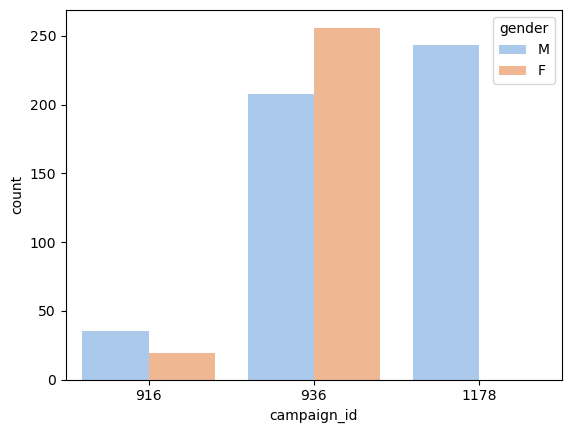

In [20]:
sns.countplot(data=df_slice, x='campaign_id', hue='gender', palette='pastel')

In [21]:
print('Age distribution per campaign:')

print(df_slice.groupby(['campaign_id', 'age']).size())

Age distribution per campaign:
campaign_id  age  
1178         30-34    102
             35-39     79
             40-44     58
             45-49      4
916          30-34     29
             35-39     12
             40-44      6
             45-49      7
936          30-34    196
             35-39     89
             40-44     75
             45-49    104
dtype: int64


<Axes: xlabel='campaign_id', ylabel='count'>

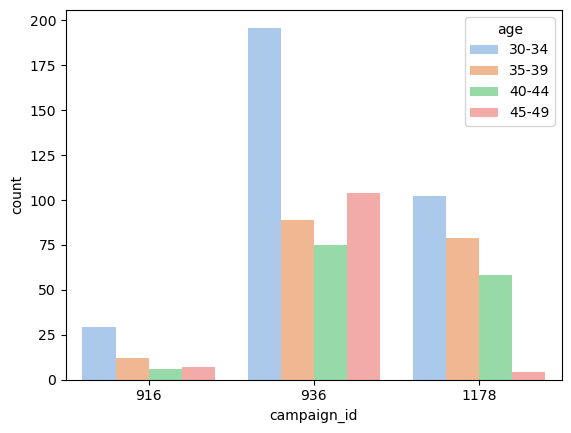

In [22]:
sns.countplot(data=df_slice, x='campaign_id', hue='age', palette='pastel')

In [23]:
print("Analysis of the engagement with different types of content:")

print(df_slice.groupby('campaign_id').clicks.sum())

Analysis of the engagement with different types of content:
campaign_id
1178    9577
916      113
936     1984
Name: clicks, dtype: int64


<Axes: ylabel='clicks'>

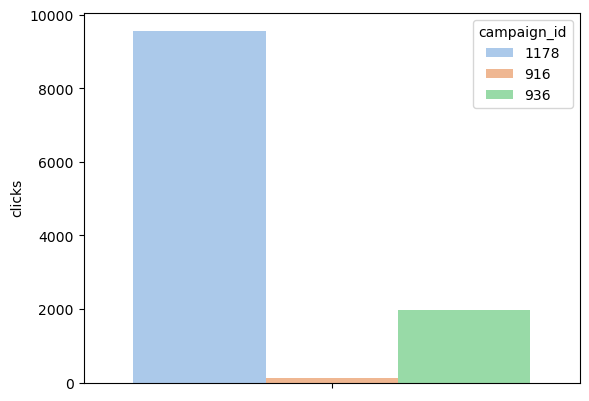

In [24]:
# Group by 'campaign_id' and sum the 'clicks'
campaign_clicks = df_slice.groupby('campaign_id')['clicks'].sum().reset_index()

# Plot the summed clicks per campaign_id
sns.barplot(data=campaign_clicks, hue='campaign_id', y='clicks', palette='pastel')

In [25]:
print("Analysis of timeframe:")

print(df_slice.campaign_duration.value_counts())

Analysis of timeframe:
campaign_duration
0    761
Name: count, dtype: int64


In [26]:
# Get the duration for each of the campaigns
print(df_slice.groupby(['campaign_id', 'reporting_start']).size())

campaign_id  reporting_start
1178         2017-08-18          5
             2017-08-19         18
             2017-08-20         23
             2017-08-21         19
             2017-08-22         23
             2017-08-23         38
             2017-08-24         24
             2017-08-25         17
             2017-08-26         14
             2017-08-27         11
             2017-08-28         21
             2017-08-29         18
             2017-08-30         12
916          2017-08-17         16
             2017-08-18         11
             2017-08-19          2
             2017-08-25          1
             2017-08-26          4
             2017-08-27          6
             2017-08-29          5
             2017-08-30          9
936          2017-08-18         54
             2017-08-19         53
             2017-08-20         42
             2017-08-21         61
             2017-08-22         50
             2017-08-23         47
             2017-08-24   

<Axes: xlabel='campaign_id', ylabel='reporting_start'>

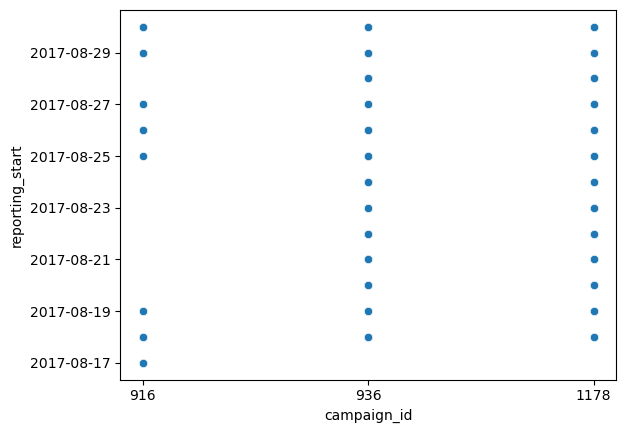

In [27]:
sns.scatterplot(data=df_slice, x='campaign_id', y='reporting_start')

In [28]:
# Calculate the total duration (number of unique days) for each campaign
total_duration_per_campaign = (
    df_slice.groupby('campaign_id')['reporting_start']
    .nunique()  # Count unique dates
    .astype(int)  # Convert to integer
)

# Display the result
print(total_duration_per_campaign)

campaign_id
1178    13
916      8
936     13
Name: reporting_start, dtype: int32


## Further analysys of the results and gathering of useful insights from the data ##

In [29]:
df_slice.dtypes

ad_id                           int64
reporting_start        datetime64[ns]
reporting_end          datetime64[ns]
campaign_id                    object
age                            object
gender                         object
interest1                       int64
interest2                       int64
interest3                       int64
impressions                   float64
clicks                          int64
spent                         float64
total_conversion              float64
approved_conversion           float64
campaign_duration               int64
engagement_rate               float64
dtype: object

In [30]:
df_slice.head()

,ad_id,reporting_start,reporting_end,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,campaign_duration,engagement_rate
0,708746,2017-08-17,2017-08-17,916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0,0,0.000136
1,708749,2017-08-17,2017-08-17,916,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0,0,0.000112
2,708771,2017-08-17,2017-08-17,916,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0,0,0.000000
3,708815,2017-08-30,2017-08-30,916,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0,0,0.000235
4,708818,2017-08-17,2017-08-17,916,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0,0,0.000242


The non-number types of data (demographic attributes - age, gender as well as start/end times) were fully analysed in the previous sections.
Lets concentrate on the numerical type of data only and to expand the analysis by following their correlations.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'ad_id'),
  Text(1.5, 0, 'interest1'),
  Text(2.5, 0, 'interest2'),
  Text(3.5, 0, 'interest3'),
  Text(4.5, 0, 'impressions'),
  Text(5.5, 0, 'clicks'),
  Text(6.5, 0, 'spent'),
  Text(7.5, 0, 'total_conversion'),
  Text(8.5, 0, 'approved_conversion'),
  Text(9.5, 0, 'engagement_rate')])

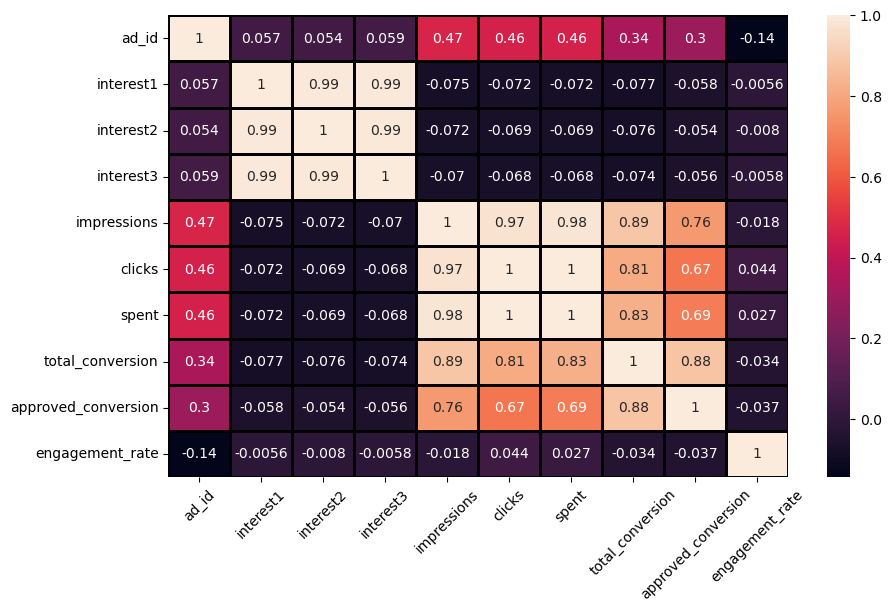

In [31]:
# Constructing a heatmap of all numerical data types
ax=plt.figure(figsize=(10,6))

corr = df_slice.select_dtypes(include=['number']).drop(columns=['campaign_duration']).corr()
sns.heatmap(corr,linewidths=1,linecolor='black',annot=True)
plt.xticks(rotation=45)

Interest1, interest2 and interest3 are the user interests and likes of facebook users who were taregted for the ad.
According to the heatmap, these attributes show insignificant corelation with every other charachteristic of the dataset.
We exclude them from further interpretations as they would bring no value to the analysis.

Lets explain the meaning of the more important features that we will look into:
* "spent" - the amount of money spent on each campaign
* "impressions" - the number of times the ad was shown to the users
* "clicks" - the number of time users clicked on the ad
* "total_conversion" - the number of users who have clicked the ad and have made a purchase or installed an app
* "approved_conversion" - the number of conversations that led to actual active app users
* "ad_id" - the id of specific ad inside a add set

--------------------------

Explanation of the terms "add campaign", "add set" and "add":

To understand the structure of the analisys, we have to first be able to destinguius between the terms "campaign", "add set" and "add":
* Campaign: The top-level structure that represents the overall goal or objective (e.g., driving traffic, generating leads, or increasing brand awareness)
* Ad Set: The middle layer within a campaign that defines the audience, budget, schedule, and placement for the ads. Each ad set has a unique Ad Set ID.
* Ad: The bottom layer that contains the actual creatives (e.g., images, videos, and text). Each ad has a unique Ad ID.

Example: the campaign "Summer Collection Launch" has:
* Ad Set 1: Audience: Women, aged 25-35, interested in fashion; Budget: $50/day; Schedule: June 1 - June 15; Placements: Instagram Stories and Facebook Feed

    * Ad 1:
        Creative: Image of a summer dress with "20% Off" text overlay.
        CTA: "Shop Now"
        Ad ID: 334455
    - Ad 2:
        Creative: Video showcasing a model wearing the summer collection.
        CTA: "View Collection"
        Ad ID: 334456
- Ad Set 2: Men, aged 25-35, interested in casual wear; $30 per day; June 1 - June 15; Facebook Feed
    - Add1: ...
    - Add2: ...

In [32]:
# cost analysis
df_slice['campaign_id'] = df_slice['campaign_id'].astype(int) #to be able too apply custom ordering based on integers
custom_order = [1178, 936, 916]

print('Campaign wise amount spent (money)')
print((df_slice.groupby(['campaign_id'])).spent.sum().reindex(custom_order))
print('--------------------------')

print('Campaign wise clicks')
print((df_slice.groupby(['campaign_id'])).clicks.sum().reindex(custom_order))
print('-------------------------')

print('Campaign wise impressions')
print((df_slice.groupby(['campaign_id'])).impressions.sum().reindex(custom_order))
print('-------------------------')

print('Campaign wise total conversions')
print((df_slice.groupby(['campaign_id'])).total_conversion.sum().reindex(custom_order))
print('---------------------------')

print('Campaign wise approved conversions')
print((df_slice.groupby(['campaign_id'])).approved_conversion.sum().reindex(custom_order))
print('---------------------------')

print('Campaign wise ad count')
print((df_slice.groupby(['campaign_id'])).ad_id.count().reindex(custom_order))
print('===========================')

Campaign wise amount spent (money)
campaign_id
1178    16577.159998
936      2893.369999
916       149.710001
Name: spent, dtype: float64
--------------------------
Campaign wise clicks
campaign_id
1178    9577
936     1984
916      113
Name: clicks, dtype: int64
-------------------------
Campaign wise impressions
campaign_id
1178    69902476.0
936      8128187.0
916       482925.0
Name: impressions, dtype: float64
-------------------------
Campaign wise total conversions
campaign_id
1178    1050.0
936      537.0
916       58.0
Name: total_conversion, dtype: float64
---------------------------
Campaign wise approved conversions
campaign_id
1178    378.0
936     183.0
916      24.0
Name: approved_conversion, dtype: float64
---------------------------
Campaign wise ad count
campaign_id
1178    243
936     464
916      54
Name: ad_id, dtype: int64


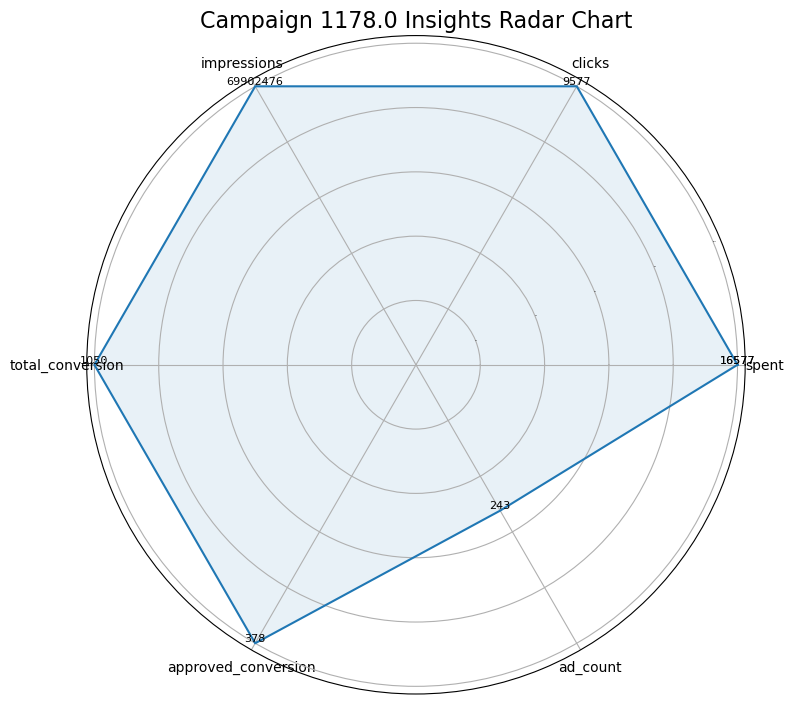

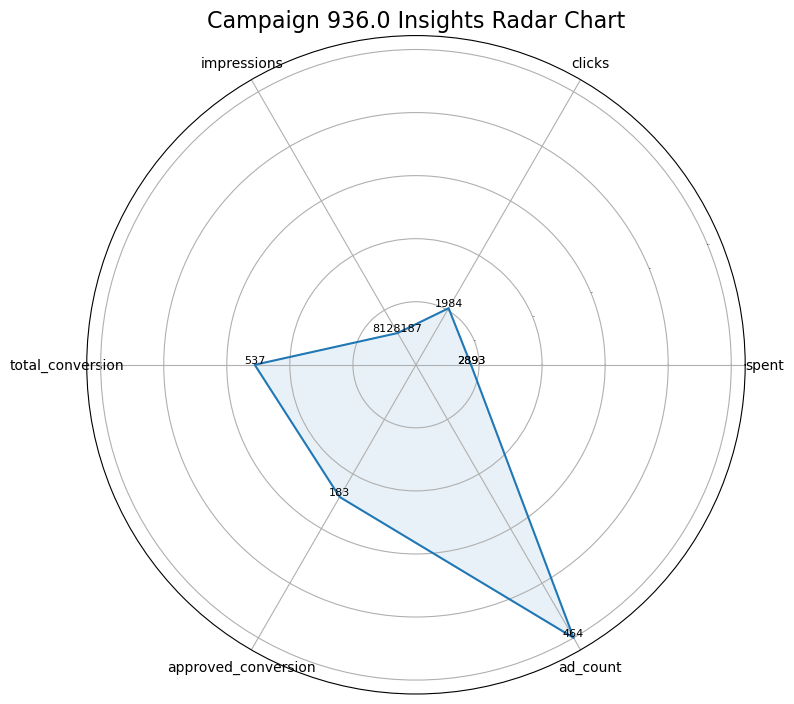

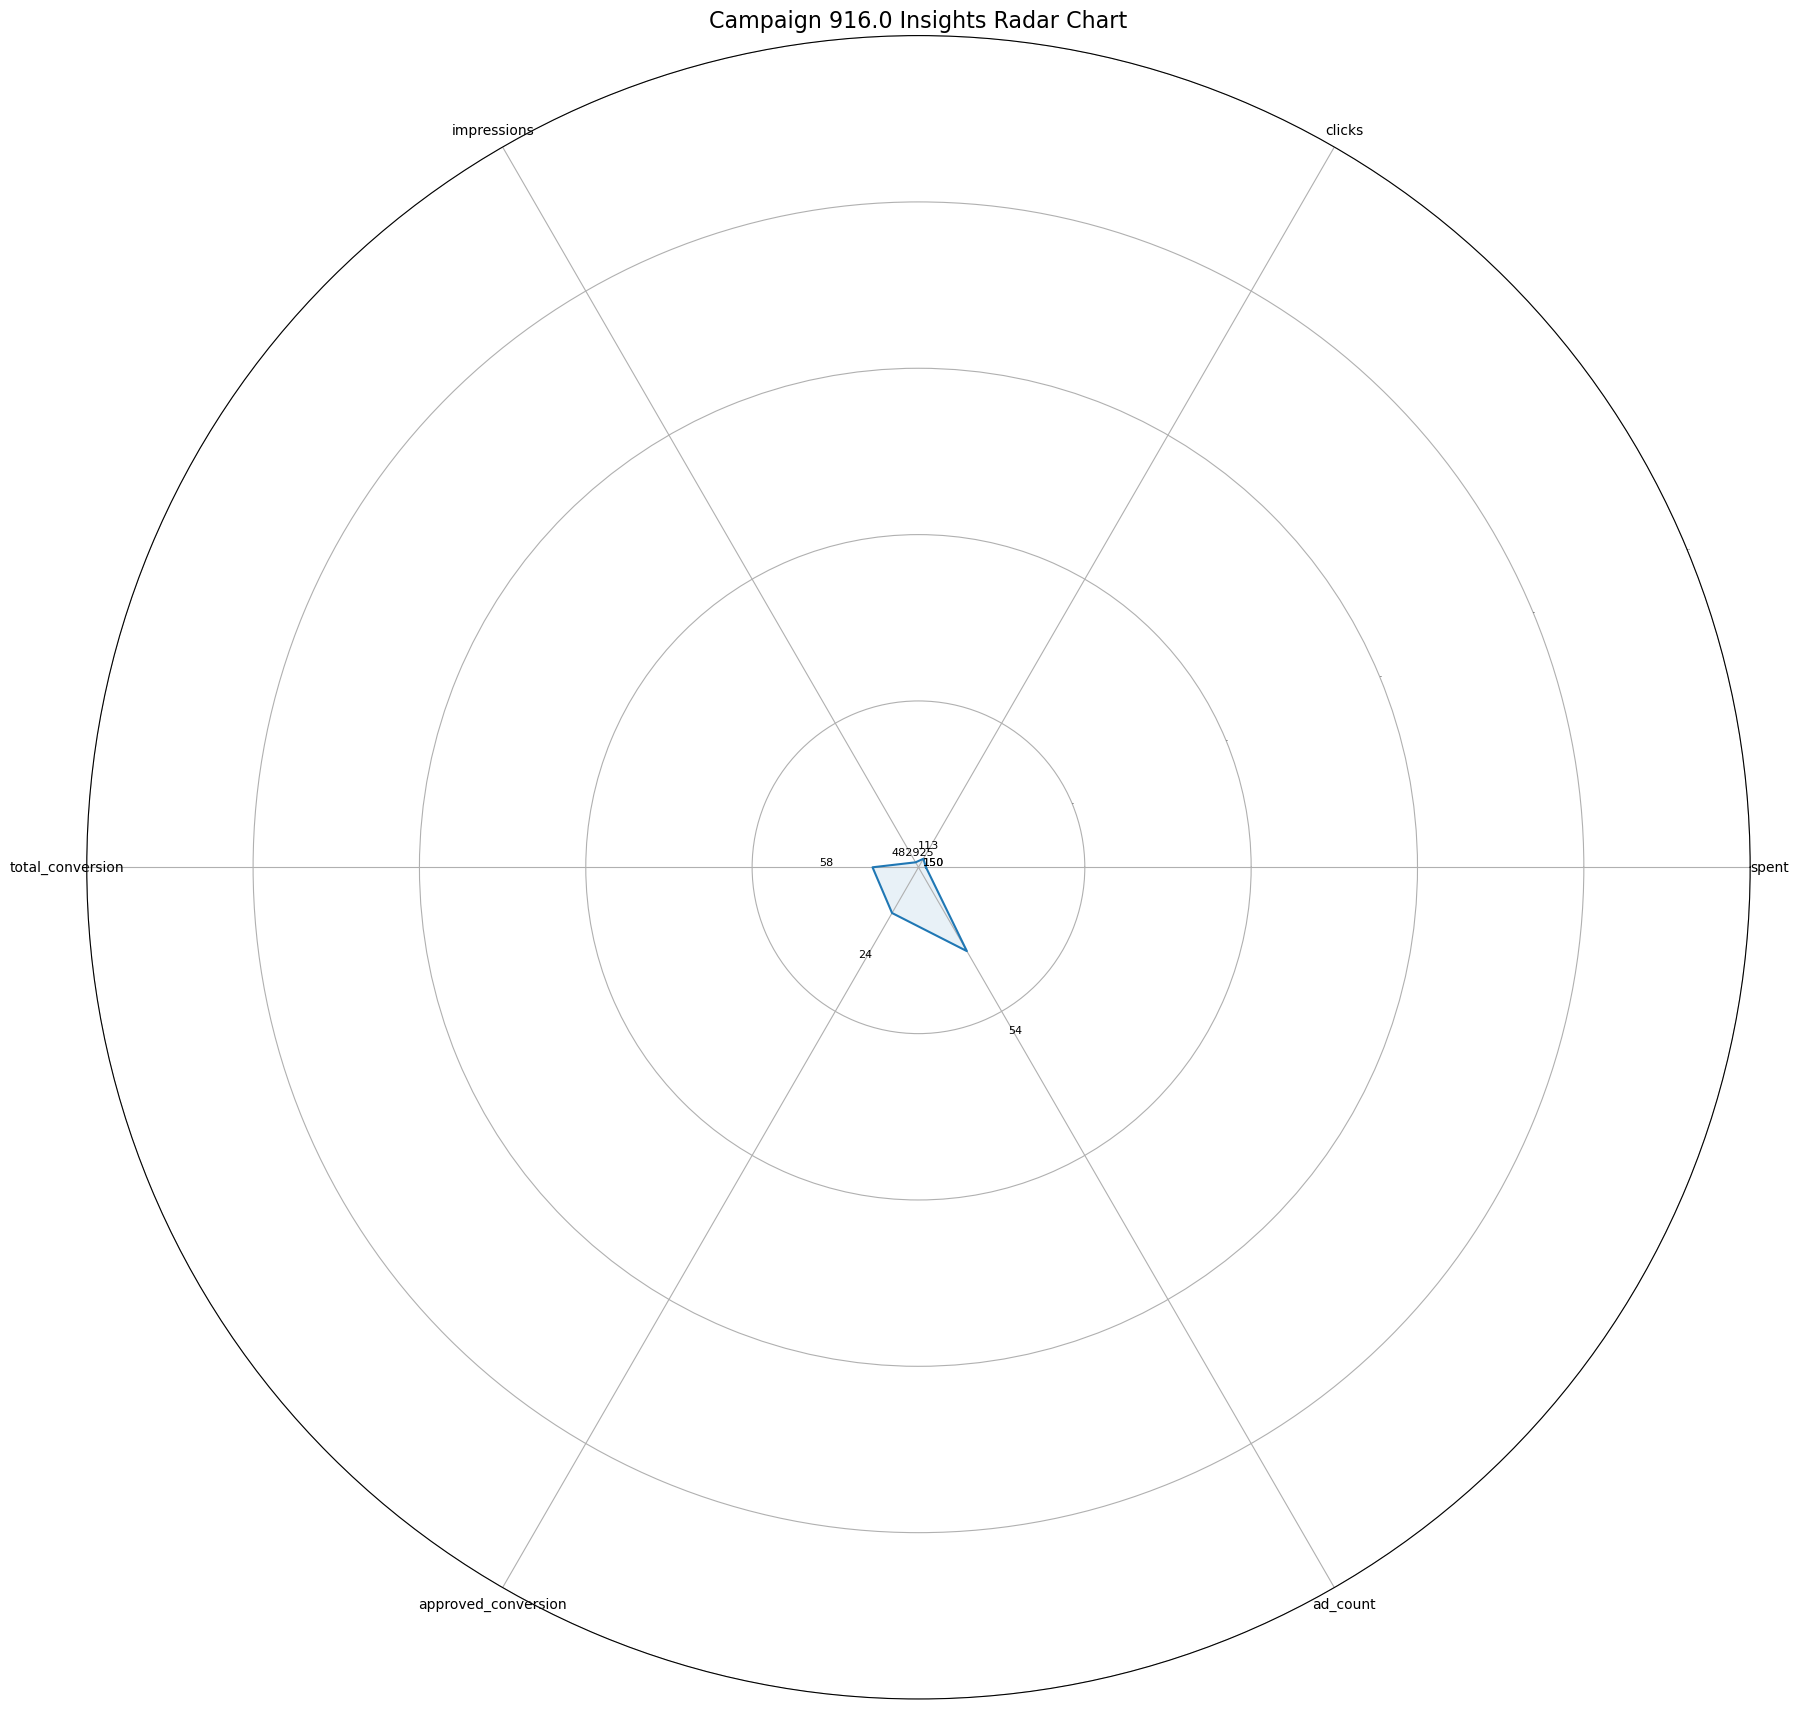

In [33]:
# Data Preparation
campaign_data = {
    "campaign_id": [1178, 936, 916],
    "spent": [16577.16, 2893.37, 149.71],
    "clicks": [9577, 1984, 113],
    "impressions": [69902476, 8128187, 482925],
    "total_conversion": [1050, 537, 58],
    "approved_conversion": [378, 183, 24],
    "ad_count": [243, 464, 54]
}
df_viz = pd.DataFrame(campaign_data)

# Normalize Data for Radar Plot
categories = ["spent", "clicks", "impressions", "total_conversion", "approved_conversion", "ad_count"]
df_normalized = df_viz.copy()
df_normalized[categories] = df_normalized[categories].apply(lambda x: x / x.max())  # Normalize for plotting

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]  # Close the circle

# Generate a Radar Chart for Each Campaign
for i, row in df_normalized.iterrows():
    # Radar Plot Setup
    if(i == 2):
         fig, ax = plt.subplots(1, 1, figsize=(18, 18), subplot_kw=dict(polar=True))
    else:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # Data for the Current Campaign
    data = row[categories].tolist()
    data += data[:1]  # Close the circle
    
    # Plot Current Campaign
    ax.plot(angles, data, label=f"Campaign {row['campaign_id']}")
    ax.fill(angles, data, alpha=0.1)

    # Add numeric values to the edges
    original_values = df_viz.loc[i, categories].tolist()  # Get original (non-normalized) values
    if(i == 2):
        # (spaced slightly further out)
        original_values = df_viz.loc[i, categories].tolist()  # Get original (non-normalized) values
        for angle, value, norm_value in zip(angles, original_values + original_values[:1], data):
            ax.text(
                angle, norm_value * 2,  # Space the text 200% further out
                f"{value:.0f}", horizontalalignment="center", verticalalignment="bottom", fontsize=8, color="black"
            )
    else:
        for angle, value in zip(angles, original_values + original_values[:1]):  # Close the circle for labels
            ax.text(
                angle, data[categories.index(categories[angles.index(angle) % len(categories)])],
                f"{value:.0f}", horizontalalignment="center", verticalalignment="bottom", fontsize=8, color="black"
            )
    

    # Radar Plot Customization
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"], fontsize=0)
    ax.set_title(f"Campaign {row['campaign_id']} Insights Radar Chart", fontsize=16)

    plt.tight_layout()
    plt.show()


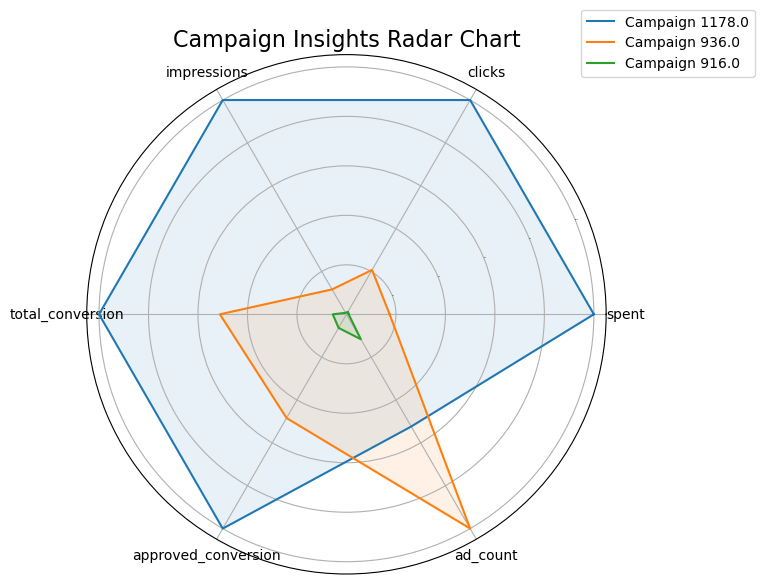

In [34]:
# Normalize Data for Radar Plot
categories = ["spent", "clicks", "impressions", "total_conversion", "approved_conversion", "ad_count"]
df_normalized = df_viz.copy()
df_normalized[categories] = df_normalized[categories].apply(lambda x: x / x.max())  # Normalize for plotting

# Radar Plot Setup
fig, ax = plt.subplots(1, 1, figsize=(8, 8), subplot_kw=dict(polar=True))
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]  # Close the circle

# Plot for Each Campaign
for i, row in df_normalized.iterrows():
    data = row[categories].tolist()
    data += data[:1]  # Close the circle
    ax.plot(angles, data, label=f"Campaign {row['campaign_id']}")
    ax.fill(angles, data, alpha=0.1)

# Radar Plot Customization
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"], fontsize=0)
ax.set_title("Campaign Insights Radar Chart", fontsize=16)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=10)

plt.tight_layout()
plt.show()


In [35]:
campaign_1178_clicks = 9577
campaign_1178_cost = 16577.159998
campaign_1178_conv = 1050
campaign_1178_approved_conv = 378
campaign_1178_impressions = 69902476
campaign_1178_adcount = 243
campaign_1178_cpc = (campaign_1178_cost/campaign_1178_clicks)
campaign_1178_cpco = (campaign_1178_cost/campaign_1178_conv)
campaign_1178_cpad = (campaign_1178_cost/campaign_1178_adcount)
campaign_1178_cpapconv = (campaign_1178_cost/campaign_1178_approved_conv)
campaign_1178_cpimp = (campaign_1178_cost/campaign_1178_impressions)

print('The cost per click of campaign_1178 is '+ str(campaign_1178_cpc))
print('The cost per conversion of campaign_1178 is '+ str(campaign_1178_cpco))
print('The cost per ad in campaign_1178 is '+ str(campaign_1178_cpad))
print('The cost per approved conversion of campaign_1178 is '+ str(campaign_1178_cpapconv))
print('The cost per impression in campaign_1178 is '+ str(campaign_1178_cpimp))
print('---------------------------------------------------------------')


campaign_936_clicks = 1984
campaign_936_cost = 2893.369999
campaign_936_conv = 537
campaign_936_approved_conv = 183
campaign_936_impressions = 8128187
campaign_936_adcount = 464
campaign_936_cpc = (campaign_936_cost/campaign_936_clicks)
campaign_936_cpco = (campaign_936_cost/campaign_936_conv)
campaign_936_cpad = (campaign_936_cost/campaign_936_adcount)
campaign_936_cpapconv = (campaign_936_cost/campaign_936_approved_conv)
campaign_936_cpimp = (campaign_936_cost/campaign_936_impressions)

print('The cost per click of campaign_936 is '+ str(campaign_936_cpc))
print('The cost per conversion of campaign_936 is '+ str(campaign_936_cpco))
print('The cost per ad in campaign_936 is '+ str(campaign_936_cpad))
print('The cost per approved conversion of campaign_936 is '+ str(campaign_936_cpapconv))
print('The cost per impression in campaign_936 is '+ str(campaign_936_cpimp))
print('---------------------------------------------------------------')

campaign_916_clicks = 113
campaign_916_cost = 149.710001
campaign_916_conv = 58
campaign_916_approved_conv = 24
campaign_916_impressions = 482925
campaign_916_adcount = 54
campaign_916_cpc = (campaign_916_cost/campaign_916_clicks)
campaign_916_cpco = (campaign_916_cost/campaign_916_conv)
campaign_916_cpad = (campaign_916_cost/campaign_916_adcount)
campaign_916_cpapconv = (campaign_916_cost/campaign_916_approved_conv)
campaign_916_cpimp = (campaign_916_cost/campaign_916_impressions)

print('The cost per click of campaign_916 is '+ str(campaign_916_cpc))
print('The cost per conversion of campaign_916 is '+ str(campaign_916_cpco))
print('The cost per ad in campaign_916 is '+ str(campaign_916_cpad))
print('The cost per approved conversion of campaign_916 is '+ str(campaign_916_cpapconv))
print('The cost per impression in campaign_916 is '+ str(campaign_916_cpimp))
print('---------------------------------------------------------------')

The cost per click of campaign_1178 is 1.7309345304375063
The cost per conversion of campaign_1178 is 15.787771426666666
The cost per ad in campaign_1178 is 68.2187654238683
The cost per approved conversion of campaign_1178 is 43.854920629629625
The cost per impression in campaign_1178 is 0.00023714696455101245
---------------------------------------------------------------
The cost per click of campaign_936 is 1.4583518140120968
The cost per conversion of campaign_936 is 5.388026068901303
The cost per ad in campaign_936 is 6.23571120474138
The cost per approved conversion of campaign_936 is 15.810765021857923
The cost per impression in campaign_936 is 0.0003559674499368678
---------------------------------------------------------------
The cost per click of campaign_916 is 1.3248672654867257
The cost per conversion of campaign_916 is 2.5812069137931037
The cost per ad in campaign_916 is 2.772407425925926
The cost per approved conversion of campaign_916 is 6.237916708333334
The cost pe

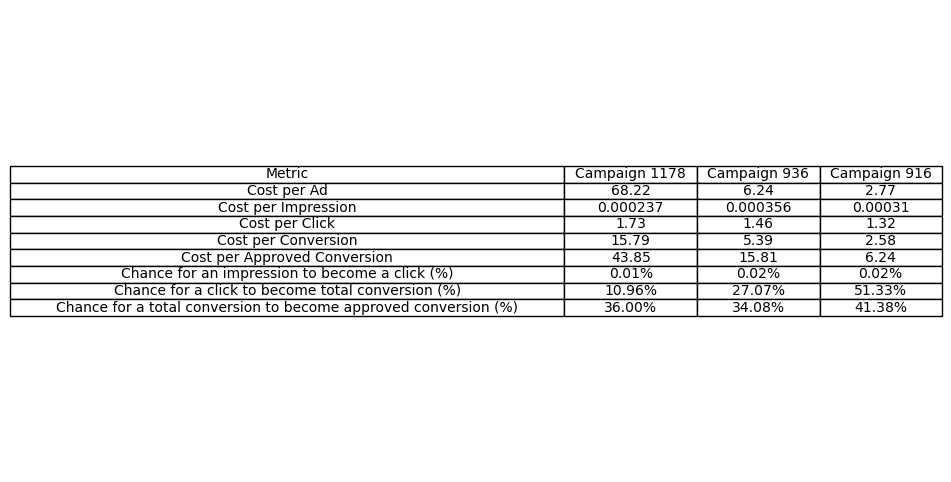

In [36]:
data = {
    "Metric": [
        "Cost per Ad",
        "Cost per Impression",
        "Cost per Click",
        "Cost per Conversion",
        "Cost per Approved Conversion",
        "Chance for an impression to become a click (%)",
        "Chance for a click to become total conversion (%)",
        "Chance for a total conversion to become approved conversion (%)"
    ],
    "Campaign 1178": [
        68.22,
        0.000237,
        1.73,
        15.79,
        43.85,
        (9577 / 69902476) * 100,
        (1050 / 9577) * 100,
        (378 / 1050) * 100
    ],
    "Campaign 936": [
        6.24,
        0.000356,
        1.46,
        5.39,
        15.81,
        (1984 / 8128187) * 100,
        (537 / 1984) * 100,
        (183 / 537) * 100
    ],
    "Campaign 916": [
        2.77,
        0.00031,
        1.32,
        2.58,
        6.24,
        (113 / 482925) * 100,
        (58 / 113) * 100,
        (24 / 58) * 100
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Format percentages
df.iloc[-3:, 1:] = df.iloc[-3:, 1:].applymap(lambda x: f"{x:.2f}%")

# Plot the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis("tight")
ax.axis("off")
table = ax.table(
    cellText=df.values,
    colLabels=["Metric", "Campaign 1178", "Campaign 936", "Campaign 916"],
    cellLoc="center",
    loc="center"
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))

plt.show()

1. Cost Efficiency

    * Cost per Ad:
    
      Campaign 1178 has the highest cost per ad at `$68.22`, indicating a substantial budget for individual ad creatives compared to Campaigns 936 (`$6.24`) and 916 (`$2.77`).
      
      Campaign 916 achieves the lowest cost per ad, suggesting a budget-conscious approach or a higher number of ads relative to the total spend.

    * Cost per Impression (CPI):
    
      Campaign 1178 achieves the lowest CPI at `$0.000237`, followed by Campaign 916 (`$0.00031`) and Campaign 936 (`$0.000356`).
      
      This indicates that Campaign 1178 maximized its budget to generate a higher volume of impressions at minimal cost. 
      This might indicate scaling benefits for campaigns with more budget being spent.
    
    * Cost per Click (CPC):
    
      Campaign 916 has the lowest CPC at `$1.32`, making it the most cost-effective in driving user engagement.
      
      Campaign 1178, despite its higher budget and high exposure to people, has a CPC of `$1.73`, while Campaign 936 performs slightly better at `$1.46`. 
      Campaign 916 performs best with `$1.32`. This indicates a poor add quality or bad targeting (targeted groups) for campaign 1178.
    
    * Cost per Conversion (CPCO):
    
      Campaign 916 excels in cost efficiency for total conversions, achieving the lowest CPCO at `$2.58`, followed by Campaign 936 (`$5.39`) and Campaign 1178 (`$15.79`).
      This indicates that campaign 916's advertising strategy is good in cathing the interest and attention of the people resulting in following the link and download/buy content.
    
    * Cost per Approved Conversion (CPAC):
    
      Campaign 916 maintains its cost advantage with a CPAC of `$6.24`, outperforming Campaign 936 (`$15.81`) and Campaign 1178 (`$43.85`).
      
      The low CPAC for Campaign 916 suggests an engaging product that people continue being customers to for prolonged period of time.

-------------------

2. Engagement Metrics
    * Chance for an Impression to Become a Click:
    
        Campaign 1178 has the lowest click-through rate (CTR) at 0.0137%, indicating potential issues in ad relevancy or audience targeting.
        
        Campaign 916 leads with the highest CTR at 0.0234%, suggesting a well-targeted audience or more compelling ad creatives. Campaign 936 follows at 0.0244%.

---------------

3. Conversion Metrics
    * Chance for a Click to Become a Total Conversion:

        Campaign 916 outperforms with 51.33% of clicks leading to total conversions, indicating highly effective post-click experiences or offers.
    
        Campaign 936 has a lower conversion efficiency at 27.07%, while Campaign 1178 trails with 10.97%, 
        reflecting potential optimization opportunities for post-click user engagement.
    
    * Chance for a Total Conversion to Become an Approved Conversion:

        Campaign 916 achieves the highest success rate with 41.38% of total conversions becoming approved conversions, showcasing better retention or user activation.
    
        Campaign 936 secures 34.08%, while Campaign 1178, despite its large budget, achieves only 36%, emphasizing potential inefficiencies in user approval processes or follow-ups.

---------------

4. Key Takeaways

* Campaign 916 demonstrates strong cost efficiency across all metrics, particularly excelling in cost per conversion, approved conversion, and engagement rates.
This makes it the most efficient campaign relative to its modest budget.

* Campaign 936 performs well in cost metrics such as CPC and CPAC but lags behind Campaign 916 in click-to-conversion rates and approved conversion rates.

* Campaign 1178 operates with a significantly higher budget, yielding impressive impressions and clicks.
However, its conversion rates (both total and approved) and associated costs suggest inefficiencies that need addressing.

---------------

5. Recommendations

    * Optimize Campaign 1178 - Investigate factors contributing to high CPAC and low conversion rates, such as audience targeting, ad creative, and post-click user journey.
    
    * Enhance Engagement for Campaign 936 - Improve CTR and conversion rates through A/B testing of ad creatives and refining audience targeting.
    
    * Scale Campaign 916 - Allocate additional budget to Campaign 916, as its efficiency in both cost and engagement metrics suggests
    high potential for scaling without significant losses in performance.
